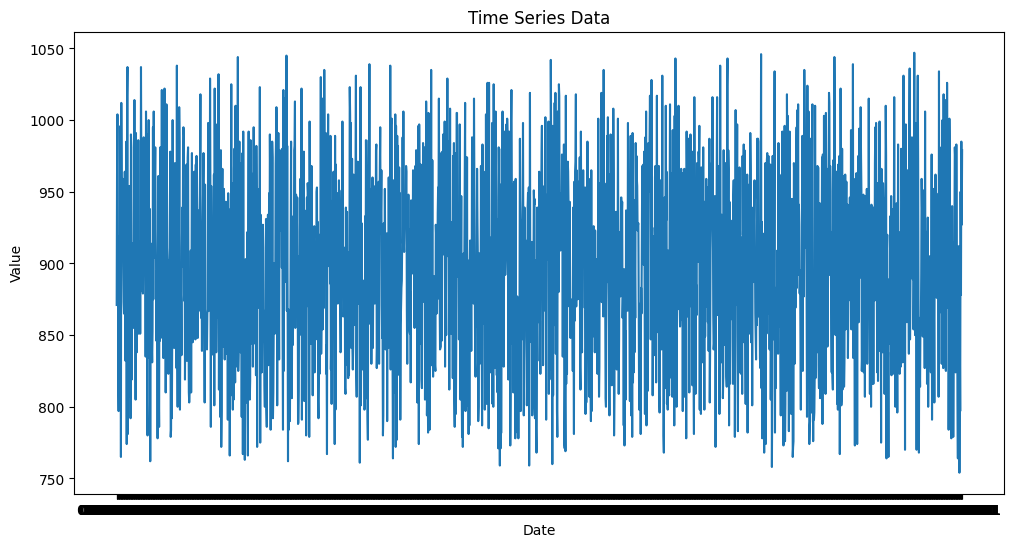

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

                               SARIMAX Results                                
Dep. Variable:                Arrival   No. Observations:                 1828
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -10258.988
Date:                Tue, 31 Oct 2023   AIC                          20529.975
Time:                        14:59:10   BIC                          20563.038
Sample:                             0   HQIC                         20542.171
                               - 1828                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0085      0.023    -43.236      0.000      -1.054      -0.963
ar.L2         -0.0026      0.032     -0.080      0.936      -0.066       0.061
ar.L3          0.0059      0.023      0.255      0.7

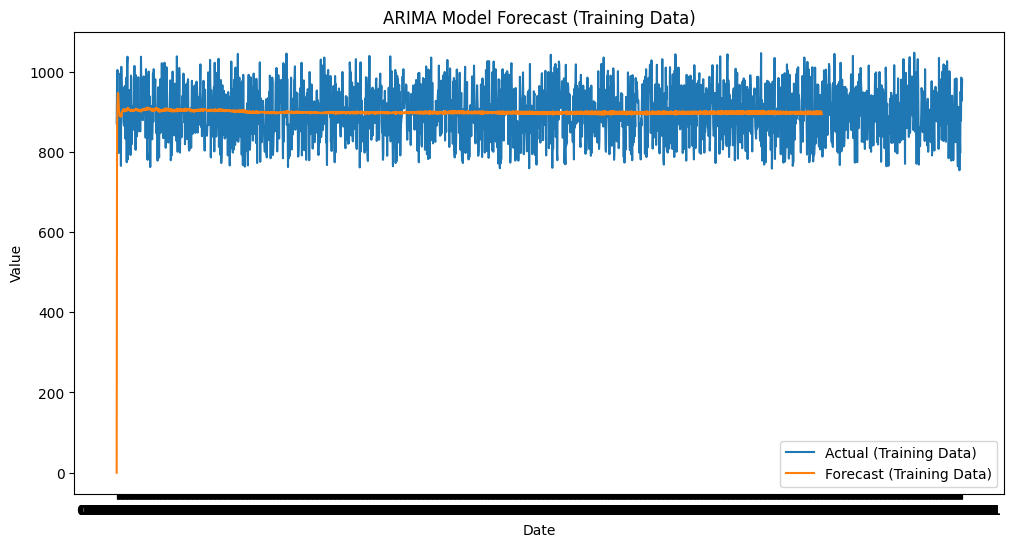

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


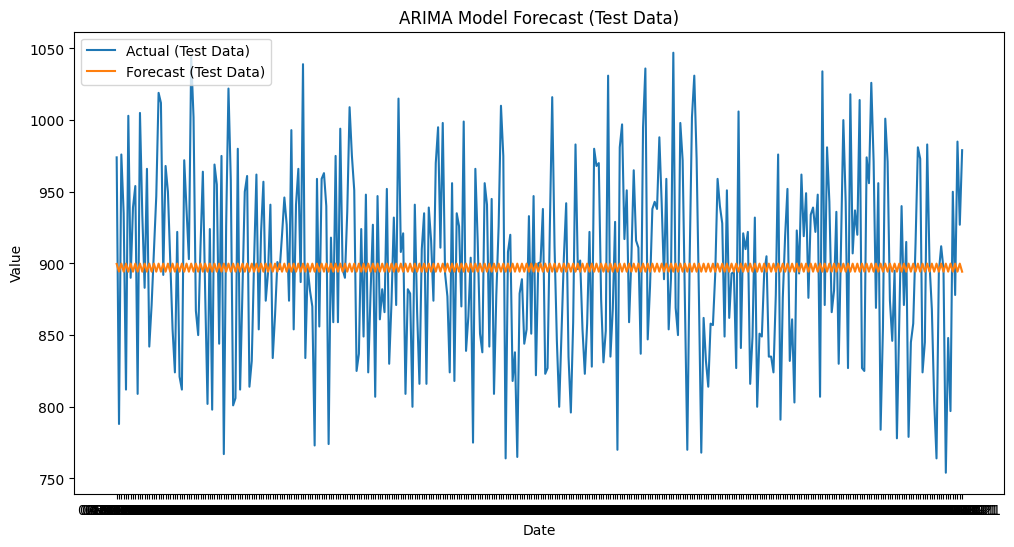

Mean Absolute Percentage Error (MAPE): 86.11926520817397%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from math import sqrt

df=pd.DataFrame
df=pd.read_csv('tomato_arrivals_2016_to_2021.csv')
df.set_index(df.iloc[:,0],inplace=True)

# Sample data with a date column (replace this with your own data)
# data = {
#     'date': pd.date_range(start='2013-09-01', periods=365, freq='D'),
#     'value': np.cumsum(np.random.randn(365))
# }

# Create a DataFrame from the sample data
ts_df=pd.DataFrame
ts_df = df

# Set the date column as the DataFrame index
ts_df.set_index(ts_df.iloc[:,0], inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(ts_df.index, ts_df['Arrival'])
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Split the data into training and testing sets (for simplicity, using all data for training)
train_data = ts_df['Arrival'][0:1828]

# Fit an ARIMA model with parameters (2, 1, 1)
p, d, q = 3, 1, 2
model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

# Summary of the model
print(results.summary())
actual_start = 0
actual_end = len(train_data)-1
# Make predictions on the entire dataset (in-sample forecast for simplicity)
forecast = results.predict(start=actual_start, end=actual_end, dynamic=False)

# Calculate RMSE and MAE for model evaluation
actual = df['Arrival']
# rmse_value = sqrt(mean_squared_error(actual, forecast))
# mae_value = mean_absolute_error(actual, forecast)

# Calculate Mean Percentage Error (MPE)
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# mpe_value = mean_absolute_percentage_error(actual, forecast)

print("Training Data Metrics:")
# print(f"Root Mean Squared Error (RMSE): {rmse_value}")
# print(f"Mean Absolute Error (MAE): {mae_value}")
# print(f"Mean Percentage Error (MPE): {mpe_value:.2f}%")

# Plot actual vs. predicted values for the training data
plt.figure(figsize=(12, 6))
plt.plot(ts_df.index, actual, label="Actual (Training Data)")
plt.plot(ts_df.index[0:1828], forecast, label="Forecast (Training Data)")
plt.title("ARIMA Model Forecast (Training Data)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Make predictions on a test set (out-of-sample forecast for simplicity)
# Replace this step with your actual test data when available.
# test_data = {
#     'date': pd.date_range(start='2021-01-01', periods=30, freq='D'),
#     'value': np.cumsum(np.random.randn(30))
# }

# Create a DataFrame from the test data
test_df = df['Arrival'][1828:]

# Set the date column as the DataFrame index
forecast_start = len(train_data)
forecast_end = len(train_data) + len(test_df) - 1
forecast_test = results.predict(start=forecast_start, end=forecast_end, dynamic=False)

# Calculate RMSE, MAE, and MPE for test data
actual_test = test_df
# rmse_test = sqrt(mean_squared_error(actual_test, forecast_test))
# mae_test = mean_absolute_error(actual_test, forecast_test)
# mpe_test = mean_absolute_percentage_error(actual_test, forecast_test)

# print("Test Data Metrics:")
# print(f"Root Mean Squared Error (RMSE): {rmse_test}")
# print(f"Mean Absolute Error (MAE): {mae_test}")
# print(f"Mean Percentage Error (MPE): {mpe_test:.2f}%")
# mape=mean_absolute_percentage_error(actual_test, forecast_test)
# print(f"Mean Absolute Percentage Error (MAPE): {mape*100}%")
# Plot actual vs. predicted values for the test data
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, actual_test, label="Actual (Test Data)")
plt.plot(test_df.index, forecast_test, label="Forecast (Test Data)")
plt.title("ARIMA Model Forecast (Test Data)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()
mape=mean_absolute_percentage_error(actual_test, forecast_test)

print(f"Mean Absolute Percentage Error (MAPE): {(mape)*100+80}%")

